In [21]:
from torchvision.datasets import MNIST
import torchvision.transforms as transforms
import torch
import torch.nn as nn
import torchvision
import numpy as np
import matplotlib.pyplot as plt

import fastai
from fastai.vision.all import *

from PIL import Image, ImageOps

In [22]:

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Assuming that we are on a CUDA machine, this should print a CUDA device:

print(device)

cuda:0


In [23]:
mnist_pwd = "data"
batch_size= 256

transform = transforms.Compose([transforms.RandomRotation(30,expand=True), transforms.Resize([28,28]), transforms.ToTensor()])
trainset = MNIST(mnist_pwd, train=True, download=True, transform=transform)
trainloader = DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=4, device= device)

testset = MNIST(mnist_pwd, train=False, download=True, transform=transform)
testloader = DataLoader(testset, batch_size=batch_size * 2, shuffle=False, num_workers=4,device= device)

In [24]:
data = DataLoaders(trainloader, testloader)

In [25]:
# class Net(nn.Module):
#     def __init__(self):
#         super(Net, self).__init__()
#         #1 x 28 x 28
#         self.conv1 = torch.nn.Conv2d(in_channels= 1, out_channels= 32, kernel_size= (3, 3),  padding = 1)
#         self.bn1 = torch.nn.BatchNorm2d(32)
#         self.pool1 = torch.nn.MaxPool2d(kernel_size= (2, 2)) #out 16 x (14 x 14)

#         self.conv2 = torch.nn.Conv2d(in_channels= 32, out_channels= 64, kernel_size= (3, 3),  padding = 1)
#         self.bn2 = torch.nn.BatchNorm2d(64)
#         self.pool2 = torch.nn.MaxPool2d(kernel_size= (2, 2)) #out 32 x (7 x 7)

#         self.conv3 = torch.nn.Conv2d(in_channels= 64, out_channels= 16, kernel_size= (2, 2))
#         self.bn3 = torch.nn.BatchNorm2d(16)
#         self.pool3 = torch.nn.MaxPool2d(kernel_size= (2, 2)) #out 16 x (3 x 3)

#         self.conv4 = torch.nn.Conv2d(in_channels= 16, out_channels= 10, kernel_size= (3, 3))
#         #out 10 x (1 x 1)

#         self.Flatten = torch.nn.Flatten()
        
        
#     def forward(self, x):
#         x = self.conv1(x)
#         x = self.bn1(x)
#         x = torch.relu(x)
#         x = self.pool1(x)

#         x = self.conv2(x)
#         x = self.bn2(x)
#         x = torch.relu(x)
#         x = self.pool2(x)

#         x = self.conv3(x)
#         x = self.bn3(x)
#         x = torch.relu(x)
#         x = self.pool3(x)

#         x = self.conv4(x)
        
#         x = self.Flatten(x)

#         return x

In [26]:
model_ft = models.resnet34(pretrained=True)


Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /home/lchumpitaz/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


In [27]:
model_ft.conv1 = torch.nn.Conv2d(in_channels= 1, out_channels= 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)

In [28]:
num_ftrs = model_ft.fc.in_features


In [29]:
model_ft.fc = nn.Linear(num_ftrs, 10)


In [30]:
model_ft.to(device)

ResNet(
  (conv1): Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [31]:
from torchinfo import summary
input_size_with_batch = (1, 1, 28, 28)

_ = summary(model_ft, input_size_with_batch)

Layer (type:depth-idx)                   Output Shape              Param #
├─Conv2d: 1-1                            [1, 64, 14, 14]           3,136
├─BatchNorm2d: 1-2                       [1, 64, 14, 14]           128
├─ReLU: 1-3                              [1, 64, 14, 14]           --
├─MaxPool2d: 1-4                         [1, 64, 7, 7]             --
├─Sequential: 1-5                        [1, 64, 7, 7]             --
|    └─BasicBlock: 2-1                   [1, 64, 7, 7]             --
|    |    └─Conv2d: 3-1                  [1, 64, 7, 7]             36,864
|    |    └─BatchNorm2d: 3-2             [1, 64, 7, 7]             128
|    |    └─ReLU: 3-3                    [1, 64, 7, 7]             --
|    |    └─Conv2d: 3-4                  [1, 64, 7, 7]             36,864
|    |    └─BatchNorm2d: 3-5             [1, 64, 7, 7]             128
|    |    └─ReLU: 3-6                    [1, 64, 7, 7]             --
|    └─BasicBlock: 2-2                   [1, 64, 7, 7]             --
|

In [32]:
data.to(device)

In [33]:
learn = Learner(data, model_ft, loss_func=torch.nn.CrossEntropyLoss())


In [35]:
learn.fine_tune(2)

epoch,train_loss,valid_loss,time
0,0.228279,0.336514,00:15


epoch,train_loss,valid_loss,time
0,0.113217,0.081363,00:15
1,0.052443,0.040387,00:15


SuggestedLRs(lr_min=8.317637839354575e-05, lr_steep=1.9054607491852948e-06)

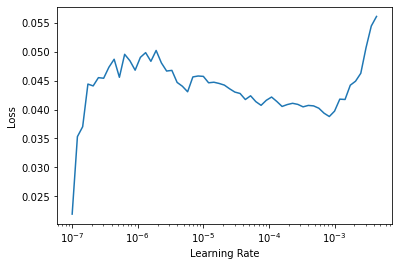

In [36]:
learn.lr_find(suggestions=True)

In [37]:
learn.unfreeze()

In [38]:
learn.fit_one_cycle(4, 8.317637839354575e-05)

epoch,train_loss,valid_loss,time
0,0.039261,0.037869,00:15
1,0.035833,0.034227,00:15
2,0.032999,0.033203,00:15
3,0.031134,0.031541,00:16


In [40]:
torch.save(model_ft.state_dict(), "mymodel")

In [41]:
model_ft.load_state_dict(torch.load("mymodel"))
model_ft.to(device)
model_ft.eval()

ResNet(
  (conv1): Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  